In [17]:
import numpy as np
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [18]:
dataframe=pd.read_csv('collegePlace.csv')

In [19]:
dataframe.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [20]:
dataframe.shape

(2966, 8)

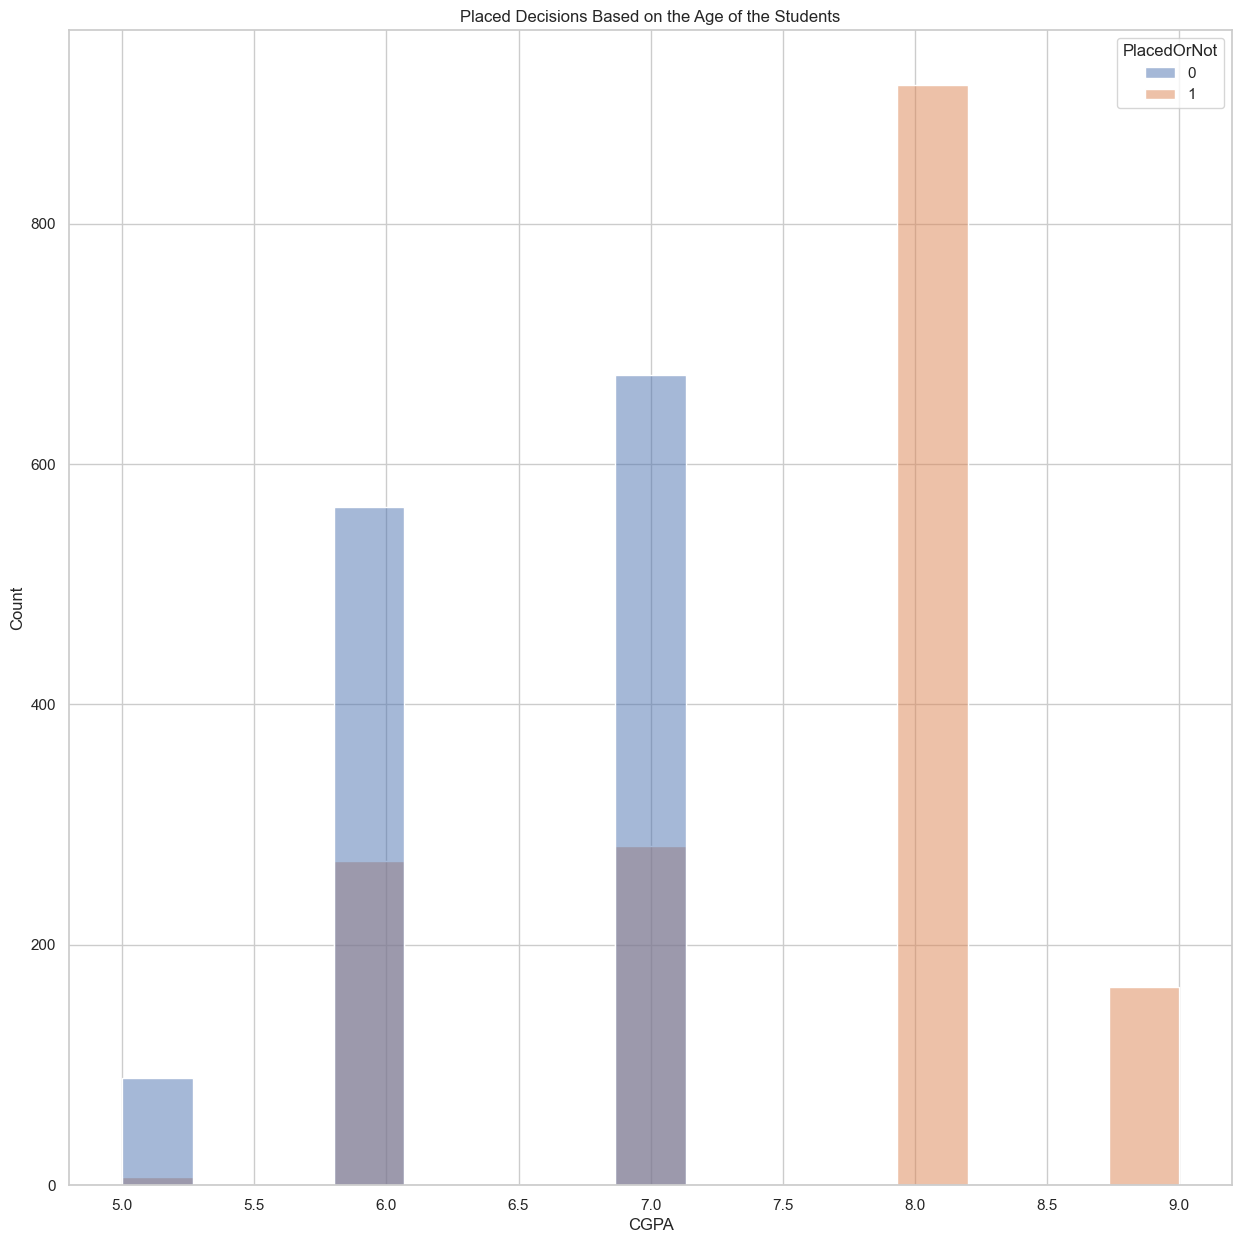

In [21]:
plt.figure(figsize=(15, 15))
plt.title("Placed Decisions Based on the Age of the Students")
sns.histplot(x="CGPA", hue="PlacedOrNot", data=dataframe)
plt.show()

In [22]:
dataframe['Gender'].replace({'Male':'1','Female':'0'},inplace=True)

In [23]:
dataframe['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [24]:
dataframe['Stream'].replace({'Electronics And Communication':'0','Computer Science':'1','Information Technology':'2','Mechanical':'3','Electrical':'4','Civil':'5'},inplace=True)

In [25]:
dataframe.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,0,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,2,1,6,0,0,1
3,21,1,2,0,8,0,1,1
4,22,1,3,0,8,1,0,1


In [31]:
import sklearn
from sklearn.model_selection import train_test_split
x = np.array(dataframe[["Age", "Gender", "Stream", "Internships", 
                   "CGPA", "Hostel","HistoryOfBacklogs"]])
y = np.array(dataframe[["PlacedOrNot"]])

In [32]:
# training a machine learning model
from sklearn.ensemble import RandomForestClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.10, 
                                                random_state=42)
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

C:\Users\hp\AppData\Local\Temp\ipykernel_21120\2813338970.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)


0.8653198653198653


In [34]:
#print("student-placement-prediction")
#a = int(input("Enter the Age of the Student: "))
#b = int(input("Enter the Gender of the student (1 = Male, 0 = Female): "))
#c = int(input("Enter Stream of student ('Electronics And Communication':'0','Computer Science':'1','Information Technology':'2','Mechanical':'3','Electrical':'4','Civil':'5'): "))
#d = int(input("Do You Done any Internships:(1= Yes, 0= No) "))
#e = int(input("Enter Your CGPA: "))
#f = int(input("Do YOU lIVE IN hOTEL(yes=1, no=0): "))
#g = int(input("Do you have any Backlogs(yes=1, no=0): "))
#features = np.array([[a, b, c, d, e, f, g]])
#print("Get Placement Or Not: ", model.predict(features))

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))